In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df1=pd.read_csv('train_ctrUa4K.csv',na_values=['NaN','nan'])

In [207]:
test=pd.read_csv('test_lAUu6dG.csv')

In [122]:
df1.shape

(614, 13)

In [123]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
df1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


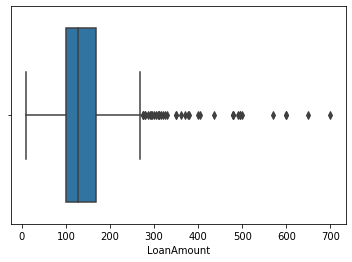

In [125]:
sns.boxplot(df1['LoanAmount'])

In [126]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [128]:
df1['Gender']=df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [129]:
df1['Married']=df1['Married'].fillna(df1['Married'].mode()[0])
df1['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [130]:
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [131]:
df1['Self_Employed']=df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [147]:
df1['LoanAmount']=df1['LoanAmount'].bfill()

In [156]:
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])
df1['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [164]:
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])
df1['Credit_History'].unique()

array([1., 0.])

In [166]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [167]:
df1_copy=df1.copy()

In [171]:
df1=df1.drop(['Loan_ID'],axis=1)

In [184]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [186]:
for i in df1.select_dtypes('object').columns:
    if(len(df1[i].unique())==2):
        df1[i]=le.fit_transform(df1[i])
        print(df1[i].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[1 0]


In [189]:
df1=pd.get_dummies(df1)

In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
Gender                     614 non-null int32
Married                    614 non-null int32
Education                  614 non-null int32
Self_Employed              614 non-null int32
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int32
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3+              614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: float64(4), int32(5), int64(1), uint8(7)
memory usage: 40.3 KB


In [208]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [209]:
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])


test['Married']=test['Married'].fillna(test['Married'].mode()[0])


test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])


test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])


test['LoanAmount']=test['LoanAmount'].bfill()

test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])


test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [210]:
test_copy=test.copy()

test=test.drop(['Loan_ID'],axis=1)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in test.select_dtypes('object').columns:
    if(len(test[i].unique())==2):
        test[i]=le.fit_transform(test[i])
        print(test[i].unique())

test=pd.get_dummies(test)

[1 0]
[1 0]
[0 1]
[0 1]


In [193]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [216]:
rfc=RandomForestClassifier()

In [217]:
from scipy.stats import randint as sp_randit
params={
    'n_estimators':sp_randit(5,150),
    'max_features':sp_randit(1,17), #based on no of columns
    'max_depth':sp_randit(2,10),
    'min_samples_leaf':sp_randit(1,50),
    'min_samples_split':sp_randit(2,10),
    'criterion':['gini','entropy']
}

In [218]:
rsearch_rf= RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,cv=3,n_jobs=-1,scoring='accuracy')
rsearch_rf.fit(x,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [219]:
rfc1=RandomForestClassifier(**rsearch_rf.best_params_)

In [220]:
rfc1.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=18, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=72,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [228]:
y_train_prob=rfc1.predict_proba(x)[:,-1]
y_train_pred=rfc1.predict(x)

In [230]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [231]:
print('Accuracy score of Random Forest',accuracy_score(y,y_train_pred))
print(confusion_matrix(y,y_train_pred))
print('AUC OF TRAIN Random Forest',roc_auc_score(y,y_train_prob))

Accuracy score of Random Forest 0.8094462540716613
[[ 82 110]
 [  7 415]]
AUC OF TRAIN Random Forest 0.8177206753554502


In [233]:
y_train_pred_new=rfc1.predict(test)

In [234]:
y_train_pred_new

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [274]:
test_copy['Loan_Status']=y_train_pred_new

In [275]:
test_copy['Loan_Status']=test_copy['Loan_Status'].astype('str')

In [276]:
test_copy['Loan_Status']=test_copy['Loan_Status'].replace({'1':'Y'},regex=True)
test_copy['Loan_Status']=test_copy['Loan_Status'].replace({'0':'N'},regex=True)

In [277]:
test_copy['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [278]:
df2=test_copy[['Loan_ID','Loan_Status']]

In [279]:
df2.to_csv('rishi_submission_new.csv',index=False)